<a href="https://colab.research.google.com/github/OleKrarup123/PythonTutorials/blob/main/timing/Timing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import useful libraries

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt



## Measure "clock time" and "process time" of same action

In [ ]:
# https://docs.python.org/3/library/time.html

N_samples=int(1e3) #Number of samples

t_clock_array=np.zeros(N_samples)       #Array for storing "clock time"   (Total time elapsed)
t_process_array=np.copy(t_clock_array)  #Array for storing "process time" (Total time spent by CPU doing calculations)


for i in range(N_samples):

  #Measure clock time for squaring pi, wait 1ms and store clock time in array
  t_clock_start=time.time()
  np.pi**2
  time.sleep(1e-3) # Wait for 1ms. Will be INCLUDED by time.time()
  t_clock_end=time.time()
  
  t_clock_array[i]=t_clock_end-t_clock_start

  #Measure process time for squaring pi, wait 1ms and store process time in array 
  t_process_start=time.process_time()
  np.pi**2
  time.sleep(1e-3) # Wait for 1ms. Will be IGNORED by time.process_time()
  t_process_end=time.process_time()

  t_process_array[i]=t_process_end-t_process_start

print(f"Mean clock time = {np.mean(t_clock_array*1e3)}ms. Mean process time = {np.mean(t_process_array*1e3)}ms ")

...

...

...

...

## Measure process time of squaring and exponentiating

In [ ]:
#Number of samples
N=int(1e6)

#Arrays to store process times
squareTimeArray=np.zeros(N)
expTimeArray=np.copy(squareTimeArray)



for i in range(N):
  #Measure squaring time in us
  startProcessTime=time.process_time_ns()/1e3
  np.pi**2
  endProcessTime=time.process_time_ns()/1e3
  squareTimeArray[i]=endProcessTime-startProcessTime

  #Measure exponentiation time in us
  startProcessTime=time.process_time_ns()/1e3
  np.exp(np.pi)
  endProcessTime=time.process_time_ns()/1e3
  expTimeArray[i]=endProcessTime-startProcessTime

print(f"Mean time for squaring pi = {np.mean(squareTimeArray):.3f} +/- {np.std(squareTimeArray):.3f} us.")
print(f"Mean time for exponentiating pi = {np.mean(expTimeArray):.3f} +/- {np.std(expTimeArray):.3f} us.")



## Plot runtime versus run number

In [ ]:

plt.figure()
plt.plot(squareTimeArray,label='Square time')
plt.plot(expTimeArray,label='Exp time')
plt.xlabel('Run number')
plt.ylabel('Time [us]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

plt.figure()
plt.plot(squareTimeArray,label='Square time')
plt.plot(expTimeArray,label='Exp time')
plt.yscale('log')
plt.xlabel('Run number')
plt.ylabel('Time [us]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()



## Make histograms of runtime

In [ ]:
#100 bins starting from smallest run time until median runtime+100 standard deviations in 100 steps
bins=np.linspace(np.min(squareTimeArray),np.median(squareTimeArray)+np.std(squareTimeArray)*100,100)

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

#Linear scale
fig, ax = plt.subplots()
plt.title(f"Runtime histograms with N_samples = {N}")
ax.hist(squareTimeArray,bins,density=True,alpha=0.5,label='Square time')
ax.hist(expTimeArray,bins,density=True,alpha=0.5,label='Exp time')
plt.xlabel('Time [us]')
plt.ylabel('Prob. Dens.')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#Logarithmic y-scale
fig, ax = plt.subplots()
plt.title(f"Runtime histograms with N_samples = {N}")
ax.hist(squareTimeArray,bins,density=True,alpha=0.5,label='Square time')
ax.hist(expTimeArray,bins,density=True,alpha=0.5,label='Exp time')
plt.xlabel('Time [us]')
plt.ylabel('Prob. Dens.')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#Double-log plot
fig, ax = plt.subplots()
plt.title(f"Runtime histograms with N_samples = {N}")
ax.hist(squareTimeArray,bins,density=True,alpha=0.5,label='Square time')
ax.hist(expTimeArray,bins,density=True,alpha=0.5,label='Exp time')
plt.xlabel('Time [us]')
plt.ylabel('Prob. Dens.')
plt.yscale('log')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()





...

...

...

## Get counts and bins 

In [ ]:
Pdens_square, bins_square = np.histogram(squareTimeArray,bins,density=True)
Pdens_exp, bins_exp = np.histogram(expTimeArray,bins,density=True)

## Plot probability densities

In [ ]:
plt.figure()
plt.plot(bins_square[0:-1],Pdens_square,'.',label='Square time')
plt.plot(bins_exp[0:-1],Pdens_exp,'.',label='EXP time')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Time [us]')
plt.ylabel('Prob. Dens.')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()






In [ ]:
threshold = 5e-6

#Find indices with probability densities above a certain minimum value
idx_square=np.where(Pdens_square>threshold)
idx_exp=np.where(Pdens_exp>threshold)

#Get bins corresponding to probability densities above minimum value
new_square_bins=bins[idx_square]
new_exp_bins=bins[idx_exp]

#Get probability densities above minimum value
Pdens_square_new=Pdens_square[idx_square]
Pdens_exp_new=Pdens_exp[idx_exp]



#Plot filtered data
plt.figure()
plt.title(f'Prob. Dens. above {threshold:.3e}')
plt.plot(new_square_bins,Pdens_square_new,'.',markersize=15,label='Square time')
plt.plot(new_exp_bins,Pdens_exp_new,'.',markersize=15,label='EXP time')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Time [us]')
plt.ylabel('Prob. Dens.')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Fit model of type $$y=bx^a$$ to data

In [ ]:
#Take log10 of bins and pdens to make fit for square data easy
x_square=np.log10(new_square_bins)
y_square=np.log10(Pdens_square_new)
model_square = np.polyfit(x_square, y_square, 1)
print("Model_Square parameters [a,b]=",model_square)
y_model_square=np.poly1d(model_square)


#Take log10 of bins and pdens to make fit for exp data easy
x_exp=np.log10(new_exp_bins)
y_exp=np.log10(Pdens_exp_new)
model_exp = np.polyfit(x_exp, y_exp, 1)
print("Model_Exp parameters [a,b]=",model_exp)
y_model_exp=np.poly1d(model_exp)

#Plot figure
plt.figure()
plt.plot(x_square,y_model_square(x_square),'b-',label = 'Model_square')
plt.plot(x_square,y_square,'C0.',markersize=15,label = 'Square time')

plt.plot(x_exp,y_model_exp(x_exp),'r-',label = 'Model_exp')
plt.plot(x_exp,y_exp,'C1.',markersize=15,label = 'Exp time')


plt.xlabel('log10(Time [us])')
plt.ylabel('log10(Pdens)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

What type of probability distribution is this? \\
... \\
... \\
... \\
... \\
... \\
... \\
... \\
... \\



It's the [Pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution )!
$$ \text{Pareto}(x,x_{min},\alpha) = \frac{\alpha x_{min}^{\alpha}}{x^{\alpha+1}} $$
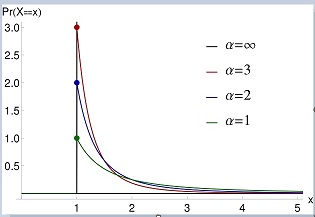

Makes sense! We must have a minimum runtime, $x_{min}$ spent "setting up" the calculation.

In [ ]:
# https://en.wikipedia.org/wiki/Pareto_distribution

def pareto(x,xmin,alpha):
  return alpha*xmin**alpha/(x**(alpha+1))

In [ ]:

xmin=np.min(bins_square)

plt.figure()
plt.title('Prob. Dens. for squaring & Pareto distribution')
plt.plot(bins_square[0:-1],Pdens_square,label='Square time')
plt.plot(bins_square[0:-1],pareto(bins_square[0:-1],xmin,2.7),'b-',label='Pareto distribution')
plt.xlabel('Time [us]')
plt.ylabel('Prob. Dens.')
plt.show()

plt.figure()
plt.title('Prob. Dens. for squaring & Pareto distribution')
plt.plot(bins_square[0:-1],Pdens_square,label='Square time')
plt.plot(bins_square[0:-1],pareto(bins_square[0:-1],xmin,2.7),'b-',label='Pareto distribution')
plt.yscale('log')
plt.xlabel('Time [us]')
plt.ylabel('Prob. Dens.')
plt.show()

plt.figure()
plt.title('Prob. Dens. for squaring & Pareto distribution')
plt.plot(bins_square[0:-1],Pdens_square,label='Square time')
plt.plot(bins_square[0:-1],pareto(bins_square[0:-1],xmin,2.7),'b-',label='Pareto distribution')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Time [us]')
plt.ylabel('Prob. Dens.')
plt.show()